# DMA Fall 19

In [0]:
NAME = "Daniel Martin"
COLLABORATORS = "Lavanya Vijayan, Ashwath Mohan, Eric Jian"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/u/1/d/1PJGxD8GzXL6xb4zuyWmtlgBbpafkCdVemLLK6WDsBXg/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- Questions can be either autograded and manually graded.
- The type of question and the points they carry are indicated in each question cell
- An autograded question has 3 cells
     - **Question cell** : Read only cell containing the question
     - **Code Cell** : This is where you write the code
     - **Grading cell** : This is where the grading occurs, and **you are required not to edit this cell**
- Manually graded questions only have the question and code cells.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` for all manually graded questions.
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding! 

In [19]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget -nc http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

File ‘yelp_reviewers.zip’ already there; not retrieving.

Archive:  yelp_reviewers.zip
Dataset Downloaded: yelp_reviewers.csv
                q3           q4  ...        q16ab        q16ac
count  7177.000000  7177.000000  ...  7177.000000  7177.000000
mean      6.838651     5.281455  ...     1.127751     3.649254
std       7.597977    16.208703  ...     4.652206     0.977100
min       1.000000     1.000000  ...     0.000000     1.000000
25%       3.000000     1.000000  ...     0.000000     3.200000
50%       5.000000     2.000000  ...     0.500000     3.777778
75%       9.000000     4.000000  ...     1.307692     4.333333
max     252.000000   607.000000  ...   342.300000     5.000000

[8 rows x 40 columns]
....SETUP COMPLETE....


In [20]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0,0,0,0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. 


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


What is the best choice of k? 

In [21]:
#Make sure you return the answer value in this function
#The return value must be an integer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def q1(df):
    
    # YOUR CODE HERE
    X = [t for t in zip(df['q4'],df['q5'],df['q6'])]
    
    for k in range(2,9):
      kmeans = KMeans(n_clusters = k, random_state = 42)
      kmeans.fit(X)
      score  = silhouette_score(X, kmeans.labels_)
      print('k: {} score: {}'.format(k, score)) 
    
print(q1(df))

k: 2 score: 0.9863463723648682
k: 3 score: 0.9791234208524076
k: 4 score: 0.9599628873541662
k: 5 score: 0.8901182729330749
k: 6 score: 0.8719076125829934
k: 7 score: 0.7879483109618463
k: 8 score: 0.7520550076052454
None


In [22]:
# YOUR ANSWER HERE
2

2

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8. 

In [23]:
#Make sure you return the answer value in this function
#The return value must be an integer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def q2(df):
  
  # YOUR CODE HERE
    c = df.loc[:,['q7','q8','q9','q10']].dropna()
    X = [t for t in zip(c['q7'],c['q8'],c['q9'],c['q10'])]
    
    for k in range(2,9):
      kmeans = KMeans(n_clusters = k, random_state = 42)
      kmeans.fit(X)
      score  = silhouette_score(X, kmeans.labels_)
      print('k: {} score: {}'.format(k, score)) 
      
print(q2(df))

k: 2 score: 0.41900743174328325
k: 3 score: 0.3205853197971985
k: 4 score: 0.27518724811190626
k: 5 score: 0.26802085068498854
k: 6 score: 0.24688596393167558
k: 7 score: 0.23758119239279019
k: 8 score: 0.23008477523720744
None


What is the best choice of k? 

In [24]:
# YOUR ANSWER HERE
2

2

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8. 

In [25]:
#Make sure you return the answer value in this function
#The return value must be an integer
def q3(df):
    
    # YOUR CODE HERE
    c = df.loc[:,['q11','q12','q13']].dropna()
    X = [t for t in zip(c['q11'],c['q12'],c['q13'])]
    
    for k in range(2,9):
      kmeans = KMeans(n_clusters = k, random_state = 42)
      kmeans.fit(X)
      score  = silhouette_score(X, kmeans.labels_)
      print('k: {} score: {}'.format(k, score)) 
      
print(q3(df))

k: 2 score: 0.4862676908782404
k: 3 score: 0.5407607014164434
k: 4 score: 0.6008327968878722
k: 5 score: 0.5840588351178274
k: 6 score: 0.6158692782063606
k: 7 score: 0.6409129678297465
k: 8 score: 0.6442572170664087
None


What is the best choice of k?

In [26]:
# YOUR ANSWER HERE
8

8

### Question 4 `(1 point)`
Consider the best cluster from Question 3 and List the number of data points in each cluster.

In [0]:
#Make sure you return the answer value in this function
#The return value must be an dictionary. Eg : {0:1000,1:500,2:1460}
from collections import Counter

def q4(df):
    
    # YOUR CODE HERE
    c = df.loc[:,['q11','q12','q13']].dropna()
    X = [t for t in zip(c['q11'],c['q12'],c['q13'])]
    
    #for k in range(2,9):
    kmeans = KMeans(n_clusters = 8, random_state = 42)
    kmeans.fit(X)
      
    return dict(Counter(kmeans.labels_))
     

In [28]:
#This is an autograded cell, do not edit
print(q4(df))

{1: 3064, 4: 4483, 2: 9962, 0: 2055, 6: 1632, 5: 3434, 3: 1228, 7: 4251}


### Question 5 `(1 point)`
Consider the best cluster from Question 3. Were there clusters that represented very funny but useless reviewers (check column definitions for columns corresponding to funny, useless etc)?  If so, print the center of that cluster.

In [0]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
def q5(df):
    
    # YOUR CODE HERE
    # q11 - percentage of cool votes
    # q12 - percentage of funny votes
    # q13 - percentage of useful votes
    c = df.loc[:,['q11','q12','q13']].dropna()
    X = [t for t in zip(c['q11'],c['q12'],c['q13'])]

    kmeans = KMeans(n_clusters = 8, random_state = 42)
    kmeans.fit(X)
    
    dic = {}
    for center in kmeans.cluster_centers_:
      funny_perc, useful_perc = center[1],center[2]
      dic[tuple(center)] = funny_perc - useful_perc
     
    return max(dic, key=dic.get)


In [30]:
#This is an autograded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best cluster from Question 3. How many reviewers were in the cluster that represented relatively equal strength in all voting categories

In [0]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54] Correction: Single Integer
def q6(df):
    
    # YOUR CODE HERE
    # q11 - percentage of cool votes
    # q12 - percentage of funny votes
    # q13 - percentage of useful votes
    c = df.loc[:,['q11','q12','q13']].dropna()
    X = [t for t in zip(c['q11'],c['q12'],c['q13'])]

    kmeans = KMeans(n_clusters = 8, random_state = 42)
    kmeans.fit(X)
    
    dic = {}
    for center,val in zip(kmeans.cluster_centers_,np.unique(kmeans.labels_)):
      cool_perc, funny_perc, useful_perc = center[0],center[1],center[2]
      dic[(tuple(center), val)] = abs((cool_perc-funny_perc)) + abs((cool_perc-useful_perc)) + abs((funny_perc-useful_perc))
      
    jackpot_label = min(dic, key=dic.get)[1]  
    return dict(Counter(kmeans.labels_))[jackpot_label]


In [32]:
#This is an autograded cell, do not edit
print(q6(df))

4251


### Question 7 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [0]:
#Make sure you return the answer value in this function
#The return value must be a float
def q7(df):
    
    # YOUR CODE HERE
    c = df.loc[:,['q7','q8','q9','q10','q11','q12','q13','q14','q15']].dropna()
    X = [t for t in zip(c.loc[:,'q7'],c['q8'],c['q9'],c['q10'],c['q11'],c['q12'],c['q13'],c['q14'],c['q15'])]
    
    kmeans = KMeans(n_clusters = 5, random_state = 42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    return score


In [34]:
#This is an autograded cell, do not edit
print(q7(df))

0.5472242282635471


### Question 8 `(1 point)`
Cluster the dataset using $k = 5$ and using features q7-q15 (refer to the column descriptions if needed).

What was the average q3 among the points in each of the clusters?

In [0]:
#Make sure you return the answer value in this function
#The return value must be an Array. Eg : [10,30,54]
import numpy as np

def q8(df):
    
    # YOUR CODE HERE
    c = df.loc[:,['q7','q8','q9','q10','q11','q12','q13','q14','q15']].dropna()
    X = [t for t in zip(c.loc[:,'q7'],c['q8'],c['q9'],c['q10'],c['q11'],c['q12'],c['q13'],c['q14'],c['q15'])]
    
    kmeans = KMeans(n_clusters = 5, random_state = 42)
    kmeans.fit(X)
    
    c['labels'] = kmeans.labels_
    c['q3'] = c['q7'].apply(np.exp)
    
    group = c.groupby('labels')['q3'].mean().values
    return group

In [36]:
#This is an autograded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[6.6 4.9 6.9 7.4 2.5]


### Question 9 `(2 points)`
**This question will be manually graded.**

Cluster the dataset using all features in the dataset

We can drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features. Let's do that now.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [37]:
# YOUR CODE HERE
df.isnull().sum()

user_id        0
q3             0
q4             0
q5             0
q6             0
q7             0
q8         35280
q9         36743
q10        24338
q11        21383
q12        21383
q13        21383
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      14469
q16ac          0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columns before removing any columns

In [38]:
# YOUR CODE HERE
df.drop(columns = ['q8','q9'])

,user_id,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16s,q16t,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
129451,kIWQXgjmVdgEs9BOgr8G5A,1,0,0,0,0.00,NaN,NaN,NaN,NaN,7,510.00,0,0.000000,0.000000,3.000000,0.013725,0.000000,0,0,0,0.000000,0,0,3.000000,0.000000,0.000000,0.000000,0.000000,3,experienced,no,0.000000,13,3,0.000000,101.000000,0,0,NaN,3.000000
116706,fXU_-5DBmNlGhI8fbX-2vQ,1,0,0,0,0.00,NaN,NaN,NaN,NaN,10,132.00,0,0.000000,0.000000,1.000000,0.045455,0.000000,1,1,0,0.000000,0,0,0.000000,0.000000,1.000000,0.000000,0.000000,1,experienced,no,0.000000,35,1,0.007576,23.000000,0,0,0.000000,1.000000
144394,prF_lbKywPnZhNqvJOOaDw,1,0,0,0,0.00,NaN,NaN,NaN,NaN,9,1792.00,0,0.000000,0.000000,3.000000,0.027344,0.000000,1,1,0,0.000000,0,0,12.000000,1.000000,1.000000,1.000000,0.000000,3,experienced,no,2.000000,36,3,0.001685,363.000000,0,0,NaN,3.000000
24699,8GHUeOm807bI5Qh4X3CHBA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,8,283.00,0,0.000000,0.000000,5.000000,0.017668,0.000000,0,0,0,0.000000,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,5,experienced,no,0.000000,33,5,0.000000,50.000000,0,0,2.000000,5.000000
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875000,0.022989,0.330719,2,6,0,1.375000,1,0,4.500000,0.125000,0.750000,1.000000,0.192489,5,experienced,no,0.375000,8,39,0.001755,91.072917,4,0,1.000000,4.875000
53000,Ihx1EQHDTIoXM35Cc08r2Q,2,1,1,2,0.69,0.69,25.00,25.00,50.00,10,532.50,0,1.414214,0.003756,3.000000,0.024413,1.000000,0,0,0,2.000000,1,0,5.500000,0.000000,0.000000,0.000000,0.205055,2,experienced,no,1.000000,22,6,0.000000,46.500000,0,3,0.000000,3.000000
64580,N22hkNXzJdz_v_KocOy6vA,1,0,0,1,0.00,0.00,0.00,0.00,100.00,5,2018.00,0,0.000000,0.000496,5.000000,0.026759,0.000000,2,1,0,1.000000,0,0,12.000000,0.000000,1.000000,1.000000,0.049554,5,experienced,no,1.000000,37,5,0.000498,197.000000,0,0,0.000000,5.000000
84662,UZ2TflixHLqkCL9G6ykCNw,5,0,0,4,1.61,1.39,0.00,0.00,100.00,6,1303.40,1,1.673320,0.000614,3.600000,0.020715,1.496663,3,3,0,0.800000,2,0,12.800000,1.000000,0.600000,0.400000,0.086515,5,experienced,no,1.400000,14,18,0.001578,167.000000,1,0,1.250000,3.600000
45130,FmQnPYMuR6ZwkmZ6D0dAAg,1,0,0,0,0.00,NaN,NaN,NaN,NaN,6,62.00,0,0.000000,0.000000,2.000000,0.016129,0.000000,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,experienced,no,0.000000,10,2,0.000000,12.000000,0,0,0.000000,2.000000
50079,HcL7R7ingTW8nenpD3X2cg,8,8,5,13,2.08,2.56,30.77,19.23,50.00,9,1047.50,2,1.281740,0.003103,3.750000,0.030788,1.198958,3,8,0,3.250000,0,0,5.500000,1.125000,1.000000,0.250000,0.137523,5,experienced,no,0.500000,3,30,0.009861,91.552083,1,13,4.000000,3.750000


By removing 2 features, we effectively have double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [39]:
# YOUR CODE HERE
dfDummies_q16s = pd.get_dummies(df['q16s'])
# chnage yes and no into binary rather than one-hot
dfDummies_q16t = pd.get_dummies(df['q16t'])

df = pd.concat([df, dfDummies_q16s, dfDummies_q16t], axis = 1)
df = df.drop(columns = ['q16s','q16t'])
df.head()

,user_id,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac,experienced,freshman,no,yes
129451,kIWQXgjmVdgEs9BOgr8G5A,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,7,510.00,0,0.000000,0.000000,3.000,0.013725,0.000000,0,0,0,0.000,0,0,3.0,0.000,0.00,0.0,0.000000,3,0.000,13,3,0.000000,101.000000,0,0,NaN,3.000,1,0,1,0
116706,fXU_-5DBmNlGhI8fbX-2vQ,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,10,132.00,0,0.000000,0.000000,1.000,0.045455,0.000000,1,1,0,0.000,0,0,0.0,0.000,1.00,0.0,0.000000,1,0.000,35,1,0.007576,23.000000,0,0,0.0,1.000,1,0,1,0
144394,prF_lbKywPnZhNqvJOOaDw,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,9,1792.00,0,0.000000,0.000000,3.000,0.027344,0.000000,1,1,0,0.000,0,0,12.0,1.000,1.00,1.0,0.000000,3,2.000,36,3,0.001685,363.000000,0,0,NaN,3.000,1,0,1,0
24699,8GHUeOm807bI5Qh4X3CHBA,1,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,8,283.00,0,0.000000,0.000000,5.000,0.017668,0.000000,0,0,0,0.000,0,0,1.0,0.000,0.00,0.0,0.000000,5,0.000,33,5,0.000000,50.000000,0,0,2.0,5.000,1,0,1,0
47453,Gd_IGX3BmRYbPD84ovLEoA,8,2,1,8,2.08,0.69,0.0,2.08,18.18,9.09,72.73,10,663.38,4,0.353553,0.002073,4.875,0.022989,0.330719,2,6,0,1.375,1,0,4.5,0.125,0.75,1.0,0.192489,5,0.375,8,39,0.001755,91.072917,4,0,1.0,4.875,1,0,1,0


Now normalize the remaining values

In [40]:
# YOUR CODE HERE
def normalize(series):
  return (series - min(series)) / (max(series) - min(series))

df = df.drop(columns = ['q8','q9','q10','q11','q12','q13','q16ab'])
df = df.apply(lambda x: normalize(x) if x.name not in ['user_id','experienced','freshman','no','yes'] else x)
df.head()


,user_id,q3,q4,q5,q6,q7,q14,q15,q16a,q16b,q16c,q16d,q16e,q16f,q16g,q16h,q16i,q16j,q16k,q16l,q16m,q16n,q16o,q16p,q16q,q16r,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ac,experienced,freshman,no,yes
129451,kIWQXgjmVdgEs9BOgr8G5A,0.000000,0.000000,0.000000,0.000000,0.00000,0.666667,0.101841,0.0,0.000,0.000000,0.50000,0.022896,0.000000,0.000000,0.000000,0.0,0.000000,0.095238,0.0,0.039474,0.000000,0.00,0.000000,0.000000,0.5,0.000000,0.230769,0.002307,0.000000,0.102394,0.000000,0.0,0.50000,1,0,1,0
116706,fXU_-5DBmNlGhI8fbX-2vQ,0.000000,0.000000,0.000000,0.000000,0.00000,0.916667,0.026210,0.0,0.000,0.000000,0.00000,0.075823,0.000000,0.008696,0.005556,0.0,0.000000,0.095238,0.0,0.000000,0.000000,1.00,0.000000,0.000000,0.0,0.000000,0.653846,0.000000,0.017045,0.022924,0.000000,0.0,0.00000,1,0,1,0
144394,prF_lbKywPnZhNqvJOOaDw,0.000000,0.000000,0.000000,0.000000,0.00000,0.833333,0.358343,0.0,0.000,0.000000,0.50000,0.045612,0.000000,0.008696,0.005556,0.0,0.000000,0.095238,0.0,0.157895,0.083333,1.00,0.021858,0.000000,0.5,0.111111,0.673077,0.002307,0.003792,0.369333,0.000000,0.0,0.50000,1,0,1,0
24699,8GHUeOm807bI5Qh4X3CHBA,0.000000,0.000000,0.000000,0.000000,0.00000,0.750000,0.056423,0.0,0.000,0.000000,1.00000,0.029472,0.000000,0.000000,0.000000,0.0,0.000000,0.095238,0.0,0.013158,0.000000,0.00,0.000000,0.000000,1.0,0.000000,0.615385,0.004614,0.000000,0.050433,0.000000,0.0,1.00000,1,0,1,0
47453,Gd_IGX3BmRYbPD84ovLEoA,0.027888,0.001627,0.000855,0.005797,0.37613,0.916667,0.132529,0.4,0.125,0.006218,0.96875,0.038347,0.165359,0.017391,0.033333,0.0,0.009106,0.119048,0.0,0.059211,0.010417,0.75,0.021858,0.008983,1.0,0.020833,0.134615,0.043829,0.003949,0.092280,0.090909,0.0,0.96875,1,0,1,0


Using the the `sum of within cluster variance` metric with the elbow method what was the best k?

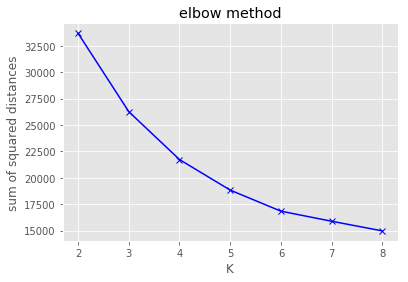

Best k: 4


In [41]:
# YOUR CODE HERE
from scipy.spatial.distance import cdist
ss = []
X = df.loc[:, 'q3':'q16ac']

for k in range(2,9):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(X)
  
  ss.append(kmeans.inertia_)
  
plt.plot(range(2,9), ss, 'bx-')
plt.xlabel('K')
plt.ylabel('sum of squared distances')
plt.title('elbow method')
plt.show()

print('Best k: 4')
  

### Question 10 `(1 points)`
**This question will be manually graded.**

For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


In [0]:
# YOUR CODE HERE


Question: To see what punctuation marks such as ?,!,, occur the most in users' reviews. Could use the features q16m through q16p as the features for our dataset. Clustering could answer the question by clustering users into groups based on the inclusion of specific punctuation marks. Could then view the centroids of each cluster to determine which clusters represent which punctuation marks and their frequency.

## Bonus question (`2 Points`) - Reviewer overlap:
- Download last week's dataset
- Aggregate cool, funny and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed. (You may need to use the pivot function) 

In [0]:
# YOUR CODE HERE
raise NotImplementedError()